In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
punctuations = string.punctuation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

In [2]:
# read the csv file
df = pd.read_csv('C:/Users/admin/Downloads/newsorg.csv/newsorg.csv', skipinitialspace=True)

In [3]:
df.head()

,title,description,category
0,Kiara Advani is a vision in white plunging nec...,Kiara Advani's fashion game has been on point ...,entertainment
1,Pankhuri Awasthy on doing Yeh Rishta Kya Kehla...,Pankhuri Awasthy is all set to make a comeback...,entertainment
2,Posters for Ekta Kapoor's Mangalyaan Series Do...,One poster shows the show’s protagonists flank...,entertainment
3,"Sonakshi Sinha’s new film gets a title, Khanda...","Directed by Shilpi Dasgupta, Sonakshi Sinha’s ...",entertainment
4,Is Samantha Doing Another Cameo For Akkinenis?...,Already Samantha has acted in Nagarjuna's Raju...,entertainment


In [4]:
# let's see count of each category
df['category'].value_counts()

entertainment    18251
general          16218
sports           15603
business         14277
technology       13943
health            9093
science           7211
automotive        2151
ent_regional      1976
ent_tv             651
gaming             337
national           232
international       57
Name: category, dtype: int64

In [5]:
df.category.unique()

array(['entertainment', 'business', 'general', 'health', 'science',
       'sports', 'technology', 'automotive', 'ent_regional', 'ent_tv',
       'gaming', 'national', 'international'], dtype=object)

In [6]:
grouped_data = df.groupby('category')

In [7]:
grouped_data.describe()

title         \
               count unique   
category                      
automotive      2151   2151   
business       14277  14277   
ent_regional    1976   1976   
ent_tv           651    651   
entertainment  18251  18251   
gaming           337    337   
general        16218  16218   
health          9093   9093   
international     57     57   
national         232    232   
science         7211   7211   
sports         15603  15603   
technology     13943  13943   

                                                                       \
                                                             top freq   
category                                                                
automotive     Samsung could still be planning to launch a pa...    1   
business       Huawei under probe by U.S. prosecutors over ne...    1   
ent_regional   Dear Comrade 1st day box office collection: Vi...    1   
ent_tv         Madhavi from Taarak Mehta Ka Ooltah Chashmah t...    1   
entertainment  Soha Ali Khan Posts Pic From London. 'Is That ...    1   
gaming         Report: Game Freak remade old Pokémon from scr...    1   
general        Kerala rains: Death toll hits 95, Centre sanct...    1   
health         High Vitamin A intake can lower skin cancer ri...    1   
international  As Democratic Debate Deadline Looms, Little Ho...    1   
national       Single-use plastic bags, cups, plates may be b...    1   
science        The mechanism for gamma-ray bursts from space ...    1   
sports         Former Spain and Barcelona coach Luis Enrique’...    1   
technology     Nintendo 'aware' of Switch Joy-Con 'drifting' ...    1   

              description         \
                    count unique   
category                           
automotive           2111   2027   
business            13579  12957   
ent_regional         1949   1919   
ent_tv                646    625   
entertainment       18002  17366   
gaming                333    295   
general             15860  15223   
health               8336   7989   
international          57     57   
national              230    216   
science              6454   6179   
sports              14715  13722   
technology          13428  12930   

                                                                       
                                                             top freq  
category                                                               
automotive                                           - Overdrive   25  
business       Watch this space as we bring you LIVE updates ...   26  
ent_regional   The third season of the TV reality show, Bigg ...    4  
ent_tv         MUMBAI: The ongoing track of Yeh Rishta Kya Ke...    8  
entertainment  Bollywood & Hollywood Photo Gallery – Check ou...   74  
gaming         Whether you're just starting or already 40 hou...    5  
general                          The biggest stories of the day.   10  
health         Following is a summary of current health news ...   10  
international  Pakistan News: Addressing a meeting of the Par...    1  
national       The ballistic missile is capable of delivering...    3  
science                                                        %   18  
sports                                                Read more…   35  
technology     Pokemon GO Wiki, Database, News, and Community...   11

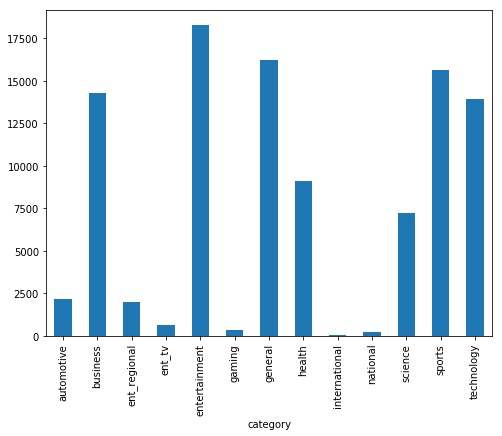

In [8]:
fig = plt.figure(figsize=(8,6))
df.groupby('category').title.count().plot.bar(ylim=0)
plt.show()

In [9]:
df.shape

(100000, 3)

In [10]:
# Let's see if there are any missing values
print(sum(df['description'].isna()))
print(sum(df['title'].isna()))
df.fillna(' ',inplace=True)

4300
0


In [11]:
df['title-description']=df['title']+' '+df['description']

In [12]:
df.head()

,title,description,category,title-description
0,Kiara Advani is a vision in white plunging nec...,Kiara Advani's fashion game has been on point ...,entertainment,Kiara Advani is a vision in white plunging nec...
1,Pankhuri Awasthy on doing Yeh Rishta Kya Kehla...,Pankhuri Awasthy is all set to make a comeback...,entertainment,Pankhuri Awasthy on doing Yeh Rishta Kya Kehla...
2,Posters for Ekta Kapoor's Mangalyaan Series Do...,One poster shows the show’s protagonists flank...,entertainment,Posters for Ekta Kapoor's Mangalyaan Series Do...
3,"Sonakshi Sinha’s new film gets a title, Khanda...","Directed by Shilpi Dasgupta, Sonakshi Sinha’s ...",entertainment,"Sonakshi Sinha’s new film gets a title, Khanda..."
4,Is Samantha Doing Another Cameo For Akkinenis?...,Already Samantha has acted in Nagarjuna's Raju...,entertainment,Is Samantha Doing Another Cameo For Akkinenis?...


In [13]:
df.iloc[0,3]

"Kiara Advani is a vision in white plunging neckline top and pants for Kabir Singh promotions - India Today Kiara Advani's fashion game has been on point during the Kabir Singh promotions. For a recent event, the actress looked stunning in an all white attire."

In [14]:
df.shape

(100000, 4)

In [15]:
df = df.drop(['title','description'],axis=1)

In [16]:
df.shape

(100000, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
category             100000 non-null object
title-description    100000 non-null object
dtypes: object(2)
memory usage: 1.5+ MB


In [18]:
df.shape

(100000, 2)

In [19]:
# load spacy english nlp
nlp = English()

In [20]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    tokens = nlp(sentence)

    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized and lowercased    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]

    # Removing stop words using stopword from spacy library and punctuations from string library
    my_tokens = [ word for word in mytokens if word not in list(STOP_WORDS) and word not in punctuations ]

    # return preprocessed list of tokens
    return my_tokens

In [21]:
# Custom transformer using spaCy
class clean_text(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean(text):
    # Let's see if there are any missing values
    try:
        # Removing spaces and converting text into lowercase
        return text.strip().lower()
    except:
        return ' '

In [22]:
# vectorizer using TfidfVectorizer
# vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer,analyzer = 'word',min_df=3, stop_words=list(STOP_WORDS), sublinear_tf=True, norm='l2', ngram_range=(1, 2))
vectorizer = CountVectorizer(max_features = 1500,tokenizer = spacy_tokenizer,ngram_range=(1,2))

### let's divide data into train and validation sets

In [23]:
X = df.drop('category',axis=1).values
y = df['category'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=99)
print(df.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(100000, 2) (95000, 1) (5000, 1) (95000,) (5000,)


In [24]:
X_train = X_train.ravel()

In [25]:
X_train.shape

(95000,)

In [26]:
X_test = X_test.ravel()

In [27]:

X_test.shape

(5000,)

In [28]:
y_train.shape

(95000,)

In [29]:
X_train

array(['ICC World Cup 2019: Indian fan dies after MS Dhoni’s dismissal in the semi-final - CricTracker Ever since MS Dhoni started donning the national colours, his fandom has only increased. The veteran turned 38 years old and',
       "Horoscope Today, June 29, 2019: Shopping spree on cards for Taurians; here's your daily astrology prediction - Times Now From obstacles and hurdles to opportunities and surprises, check out today's astrology prediction to find out what Saturday has in store for you.",
       "Stocks to watch: Eicher Motors, Ashok Leyland, IOCL, Axis Bank, ZEEL, DHFL - Business Standard Here's a list of companies whose shares are expected to trade actively in today's trading session.",
       ...,
       "Ashes 2019: How four Aussie pace guns finally fit together - Wide World of Sports 'It's just great to be back in a squad'",
       '"Such Bipartisan Support Is Gladdening": PM Modi After Passage Of J&K Bills - NDTV News Prime Minister Narendra Modi today thanked lawmak

In [30]:
# Selecting top 1000 best features using SelectKBest and storing it in an array
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
pipe = Pipeline([('vect', tfidf), ('chi',  SelectKBest(chi2, k=1000))])
text_features = pipe.fit_transform(df['title-description'], df['category'])
text_features = text_features.toarray()
labels = df.category
text_features.shape

(100000, 1000)

### let's compare different models using cross validation

 75%|███████████████████████████████████████████████████████████████                     | 3/4 [03:22<01:27, 87.27s/it]C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify

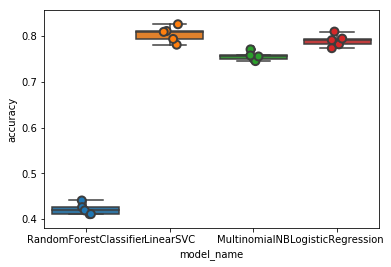

In [31]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(solver = 'lbfgs',max_iter=200,random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in tqdm(models):
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, text_features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

### above chart show's that linear_svc and logistic regression model performs well, so let's go ahead with linear_svc model as our training model

In [32]:
# croos_validation results from different models based on accuracy
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.440974
1,RandomForestClassifier,1,0.426436
2,RandomForestClassifier,2,0.411071
3,RandomForestClassifier,3,0.419305
4,RandomForestClassifier,4,0.411253
5,LinearSVC,0,0.781287
6,LinearSVC,1,0.793831
7,LinearSVC,2,0.811241
8,LinearSVC,3,0.825956
9,LinearSVC,4,0.809352


In [33]:
linear_svc = LinearSVC()

In [34]:
# Create pipeline for Bag of Words model
pipe = Pipeline([("cleaner", clean_text()),
                 ('vectorizer', vectorizer),
                 ('chi',  SelectKBest(chi2, k='all')),
                 ('tfidf',TfidfTransformer()),
                 ('classifier', linear_svc)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.clean_text object at 0x0000027377F3C1D0>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1500, min_df=1,
      ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [35]:
pred = pipe.predict(X_test)

In [36]:
pred

array(['general', 'science', 'science', ..., 'entertainment', 'sports',
       'business'], dtype=object)

In [37]:
# count of eachh category in predictions
unique, counts = np.unique(pred, return_counts=True)
dict(zip(unique, counts))

{'automotive': 129,
 'business': 756,
 'ent_regional': 84,
 'ent_tv': 31,
 'entertainment': 932,
 'gaming': 2,
 'general': 561,
 'health': 459,
 'science': 390,
 'sports': 849,
 'technology': 807}

In [38]:
# count of each category in actual test set
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'automotive': 130,
 'business': 740,
 'ent_regional': 117,
 'ent_tv': 36,
 'entertainment': 900,
 'gaming': 12,
 'general': 776,
 'health': 423,
 'national': 8,
 'science': 370,
 'sports': 768,
 'technology': 720}

In [39]:
# so let's calculate accuracy
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(pred,y_test)
acc = np.sum(conf_mat.diagonal())/np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 84.24000000000001 %


### Now let's Train it on entrire dataset

In [40]:
X = X.ravel()

X.shape

(100000,)

In [41]:
y.shape

(100000,)

In [43]:
# Create pipeline for Bag of Words model
pipe = Pipeline([("cleaner", clean_text()),
                 ('vectorizer', vectorizer),
                 ('chi',  SelectKBest(chi2, k='all')),
                 ('tfidf',TfidfTransformer()),
                 ('classifier', linear_svc)])

# model generation
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.clean_text object at 0x000002730AA1FF28>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1500, min_df=1,
      ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

### get new data to predict using our trained model from newsapi

In [79]:
from newsapi import NewsApiClient
# Init
newsapi = NewsApiClient(api_key='c0e2280d25ef481183f8b497ee36d692')

In [55]:
categories = df.category.unique()

In [56]:
categories

array(['entertainment', 'business', 'general', 'health', 'science',
       'sports', 'technology', 'automotive', 'ent_regional', 'ent_tv',
       'gaming', 'national', 'international'], dtype=object)

In [83]:
new_df = pd.DataFrame()
for i in categories:
    for page in list(range(1,6)):
        all_articles = newsapi.get_everything(q=i,
                                      sources='the-hindu,the-times-of-india,hacker-news',
                                      domains='thehindu.com,timesofindia.indiatimes.com,news.ycombinator.com',
                                      from_param='2019-10-10',
                                      to='2019-10-14',
                                      language='en',
                                      sort_by='popularity',
                                      page=page)
        new_df = new_df.append(pd.DataFrame(all_articles['articles']).filter(['title','description']),ignore_index=True)

In [84]:
# new_df1= pd.DataFrame()
new_df1 = new_df1.append(new_df,ignore_index=True)

In [85]:
new_df1.shape

(3391, 2)

In [88]:
# save this new data into csv file
new_df1.to_csv('news.csv',index=False)

### Let's Store this dataset into MongoDB

In [77]:
#Load libraries
import pandas as pd
import os
import pymongo as pymongo
from pymongo import MongoClient
import json

In [78]:
# Connect to the MongoDB, change the connection string per your MongoDB environment
Channel = MongoClient(port=27017)

In [79]:
#creating a database Appscrip_news and a collection news_csv
db = Channel['Appscrip_news'] 
news = db['news_csv']

In [83]:
# Store a Dataframe-df into MongoDB
df = pd.read_csv("news.csv")
data_json = json.loads(df.to_json(orient='records'))

In [84]:
news.insert_many(data_json)

In [85]:
#see our loaded data
cursor = news.find()
result = pd.DataFrame(list(cursor)) 
result.head(10)

,_id,description,title
0,5db0aec0f0a9b700adeeb8e6,While talking to the TimesofIndia.com exclusiv...,'Nobody wants to see Paras as saint on Bigg Boss'
1,5db0aec0f0a9b700adeeb8e7,Among the stocks that touched their 52-week hi...,6 stocks hit 52-week highs on NSE
2,5db0aec0f0a9b700adeeb8e8,Among the stocks that touched their 52-week hi...,8 stocks hit 52-week highs on NSE
3,5db0aec0f0a9b700adeeb8e9,The Nifty Bank index was trading 0.59 per cent...,Nifty Bank trades lower; YES Bank surges 24%
4,5db0aec0f0a9b700adeeb8ea,The Nifty FMCG index was trading 0.19 per cent...,FMCG index trades with negative bias; Godrej I...
5,5db0aec0f0a9b700adeeb8eb,Are streaming services killing multiplexes?Whi...,Are streaming services killing multiplexes?
6,5db0aec0f0a9b700adeeb8ec,Premji explained that one area of focus should...,Need to ensure that Internet is equitable for ...
7,5db0aec0f0a9b700adeeb8ed,Here is our guide on where to feast on Bengali...,How Chennai celebrates Durga Puja
8,5db0aec0f0a9b700adeeb8ee,The thing that works for War is that it’s able...,"‘War’ review: Though predictable, this is a sl..."
9,5db0aec0f0a9b700adeeb8ef,Starring Nandha Durairaj and Abhirami Venkatch...,SonyLIV launches Tamil web series ‘Iru Dhuruvam’


In [86]:
ids = result['_id']

In [87]:
result.shape

(3391, 3)

In [88]:
result = result.filter(['title','description'])

In [89]:
result['title-description']=result['title']+' '+result['description']

In [90]:
result = result.drop(['title','description'],axis=1)

In [91]:
result.head()

,title-description
0,'Nobody wants to see Paras as saint on Bigg Bo...
1,6 stocks hit 52-week highs on NSE Among the st...
2,8 stocks hit 52-week highs on NSE Among the st...
3,Nifty Bank trades lower; YES Bank surges 24% T...
4,FMCG index trades with negative bias; Godrej I...


In [92]:
test = result['title-description'].values.ravel()
test.shape

(3391,)

In [93]:
test

array(["'Nobody wants to see Paras as saint on Bigg Boss' While talking to the TimesofIndia.com exclusively, the Vighnaharta Ganesh actress shared that she is loving beau Paras' sanskari playboy image and is confident of him winning the show.",
       '6 stocks hit 52-week highs on NSE Among the stocks that touched their 52-week highs were BPCL, Cinevista and Whirlpool of India.',
       '8 stocks hit 52-week highs on NSE Among the stocks that touched their 52-week highs were BPCL, Abbott India, Cinevista and Dixon Technologies.',
       ...,
       'Headgear may return for men in domestic events Nieva worried over cuts suffered by boxers',
       'I’m living the dream as a professional cricketer: Marizanne Kapp Says playing outdoor cricket with the boys was a big step up',
       'Iran vows response to attack on tanker Saudi offered help, but said the vessel shut off its tracking system without responding.'],
      dtype=object)

In [94]:
# predict using our trained model
predicted_category = list(pipe.predict(test))

### let's update by adding a column 'predicted_category' in MongoDB

In [95]:
for i,x in tqdm(list(zip(ids,predicted_category))):
        db['news_csv'].update_one({"_id" : i},{"$set": {"predicted_category":x}})

100%|████████████████████████████████████████████████████████████████████████████| 3391/3391 [00:02<00:00, 1388.35it/s]


In [96]:
#see our modified collection
cursor = news.find()
result = pd.DataFrame(list(cursor)) 
result.head(10)

,_id,description,predicted_category,title
0,5db0aec0f0a9b700adeeb8e6,While talking to the TimesofIndia.com exclusiv...,entertainment,'Nobody wants to see Paras as saint on Bigg Boss'
1,5db0aec0f0a9b700adeeb8e7,Among the stocks that touched their 52-week hi...,business,6 stocks hit 52-week highs on NSE
2,5db0aec0f0a9b700adeeb8e8,Among the stocks that touched their 52-week hi...,business,8 stocks hit 52-week highs on NSE
3,5db0aec0f0a9b700adeeb8e9,The Nifty Bank index was trading 0.59 per cent...,business,Nifty Bank trades lower; YES Bank surges 24%
4,5db0aec0f0a9b700adeeb8ea,The Nifty FMCG index was trading 0.19 per cent...,business,FMCG index trades with negative bias; Godrej I...
5,5db0aec0f0a9b700adeeb8eb,Are streaming services killing multiplexes?Whi...,technology,Are streaming services killing multiplexes?
6,5db0aec0f0a9b700adeeb8ec,Premji explained that one area of focus should...,gaming,Need to ensure that Internet is equitable for ...
7,5db0aec0f0a9b700adeeb8ed,Here is our guide on where to feast on Bengali...,sports,How Chennai celebrates Durga Puja
8,5db0aec0f0a9b700adeeb8ee,The thing that works for War is that it’s able...,entertainment,"‘War’ review: Though predictable, this is a sl..."
9,5db0aec0f0a9b700adeeb8ef,Starring Nandha Durairaj and Abhirami Venkatch...,entertainment,SonyLIV launches Tamil web series ‘Iru Dhuruvam’


In [100]:
# let's save the result into .csv format
result.to_csv('mongoDB_dump.csv',index=False)